### This notebook chooses and then saves the anchor frames to use from the full observation to build the structure from motion maps

In [5]:
import glob
import json
import os
import shutil
import time

from imutils.video import FileVideoStream

import cv2
import pandas as pd

# local .json file with local path info
geladas_root = os.path.dirname(os.getcwd())

from koger_detection.landscape.drone_movement import get_anchor_frames_without_log

In [6]:
video_name = "bear_big2a_2023_08_16_koger_01_01_DJI_20230816175814_0573_D"
video_folder = "/mnt/e/porcupine-island-2023/drone-flights"
video_file = os.path.join(video_folder, video_name + ".MP4")

out_folder = os.path.join("/mnt/c/Users/benko/Documents/local_projects/bears", video_name)
os.makedirs(out_folder, exist_ok=True)

In [7]:
os.path.exists("/mnt/e/porcupine-island-2023/"), f"Video file {video_file} "

(True,
 'Video file /mnt/e/porcupine-island-2023/drone-flights/bear_big2a_2023_08_16_koger_01_01_DJI_20230816175814_0573_D.MP4 ')

### A new anchor frame is choosen whenever the number of tracked local features in a frame drops below 100

In [8]:
anchor_info, final_warps = get_anchor_frames_without_log(video_file, out_folder, 
                                                         video_name, inlier_threshold=100,
                                                         max_pseudo_anchors=1)

0 frames processed.  0 anchors saved.
2000 frames processed.  1 anchors saved.
4000 frames processed.  28 anchors saved.
6000 frames processed.  45 anchors saved.
Empty frame. Ending stream.


In [6]:
# # Save anchor frames for structure from motion processing
anchor_info.to_csv(os.path.join(out_folder, "anchor_frame_info.csv"), index=False)

### Use below code to check quality of warps between anchor frames (these warps are just for checking, won't be used elsewhere in method)

Text(0.5, 1.0, 'No Correction')

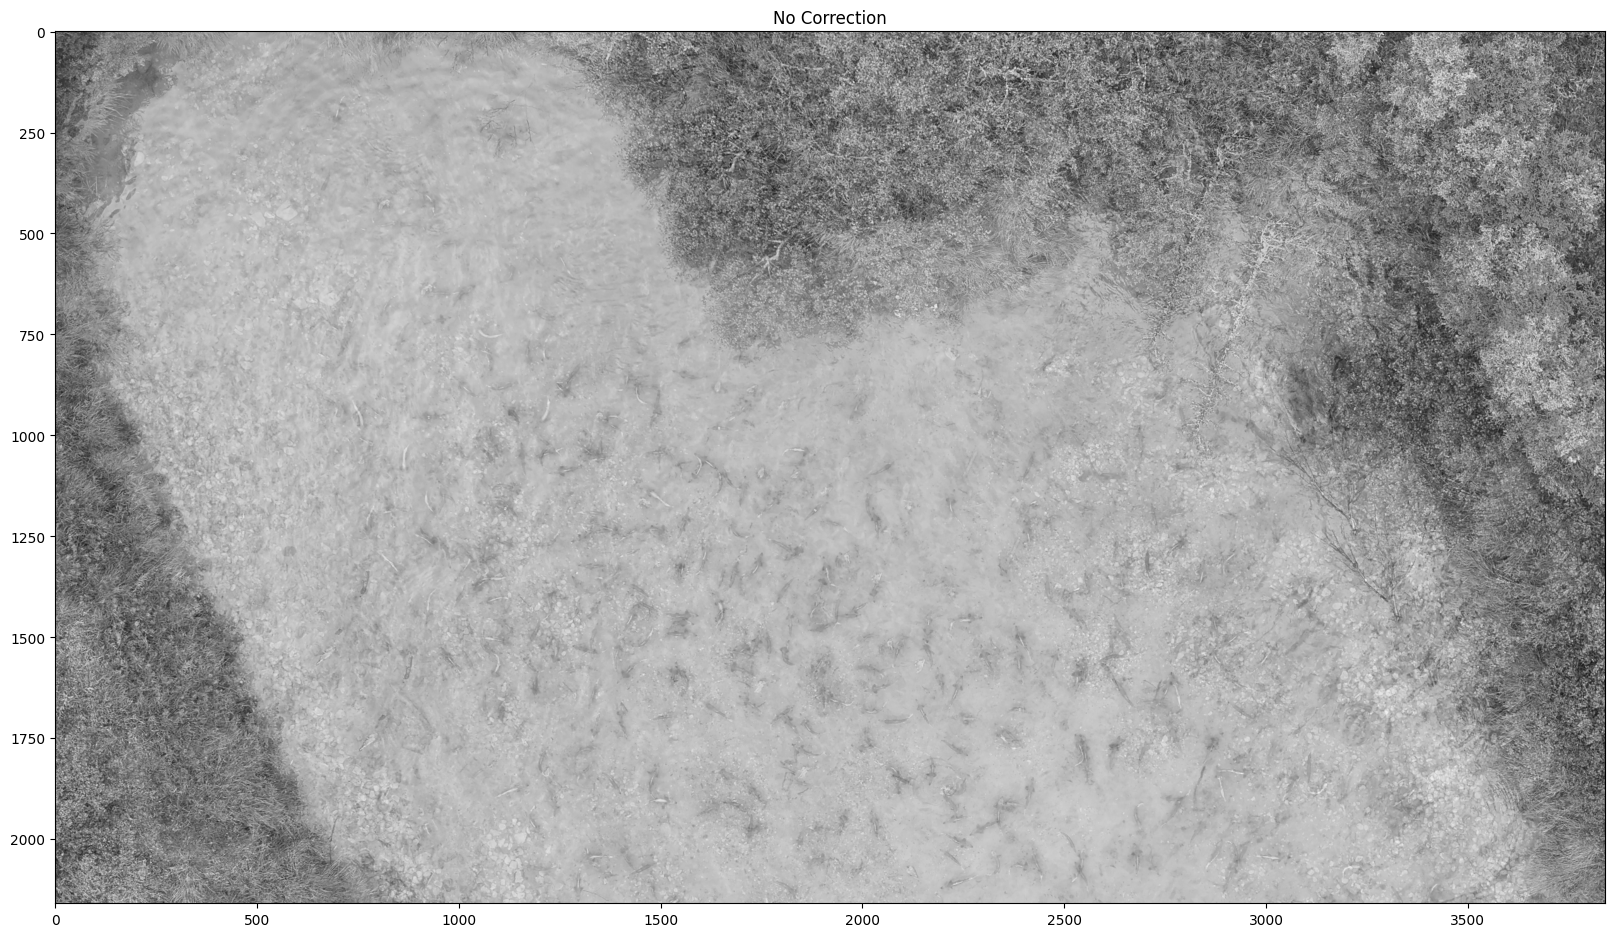

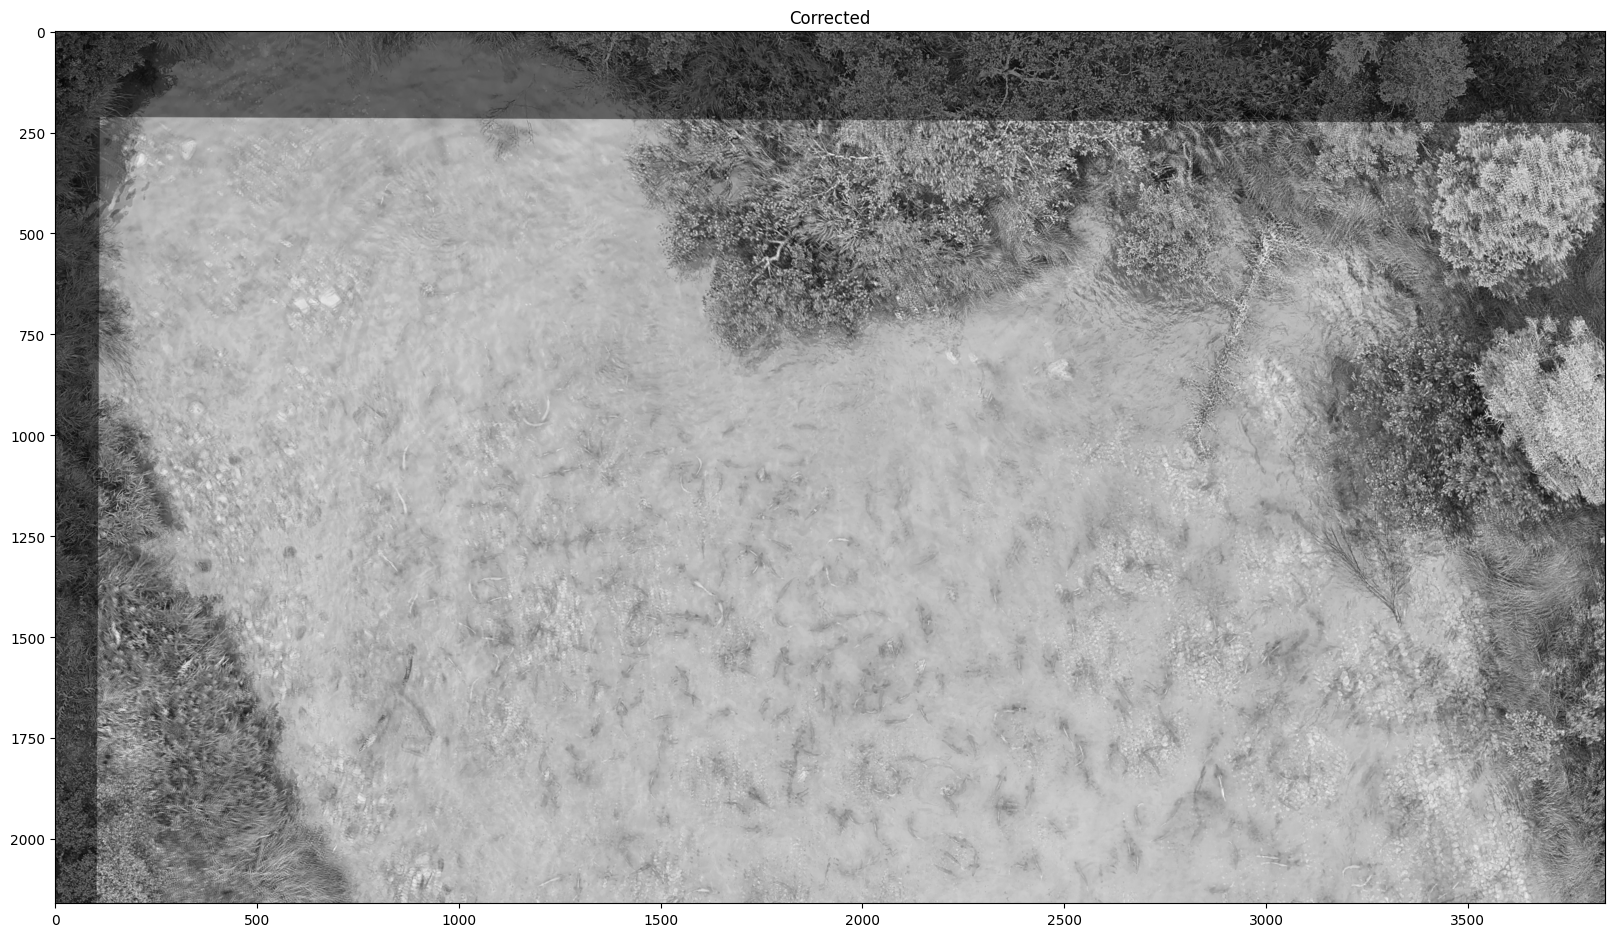

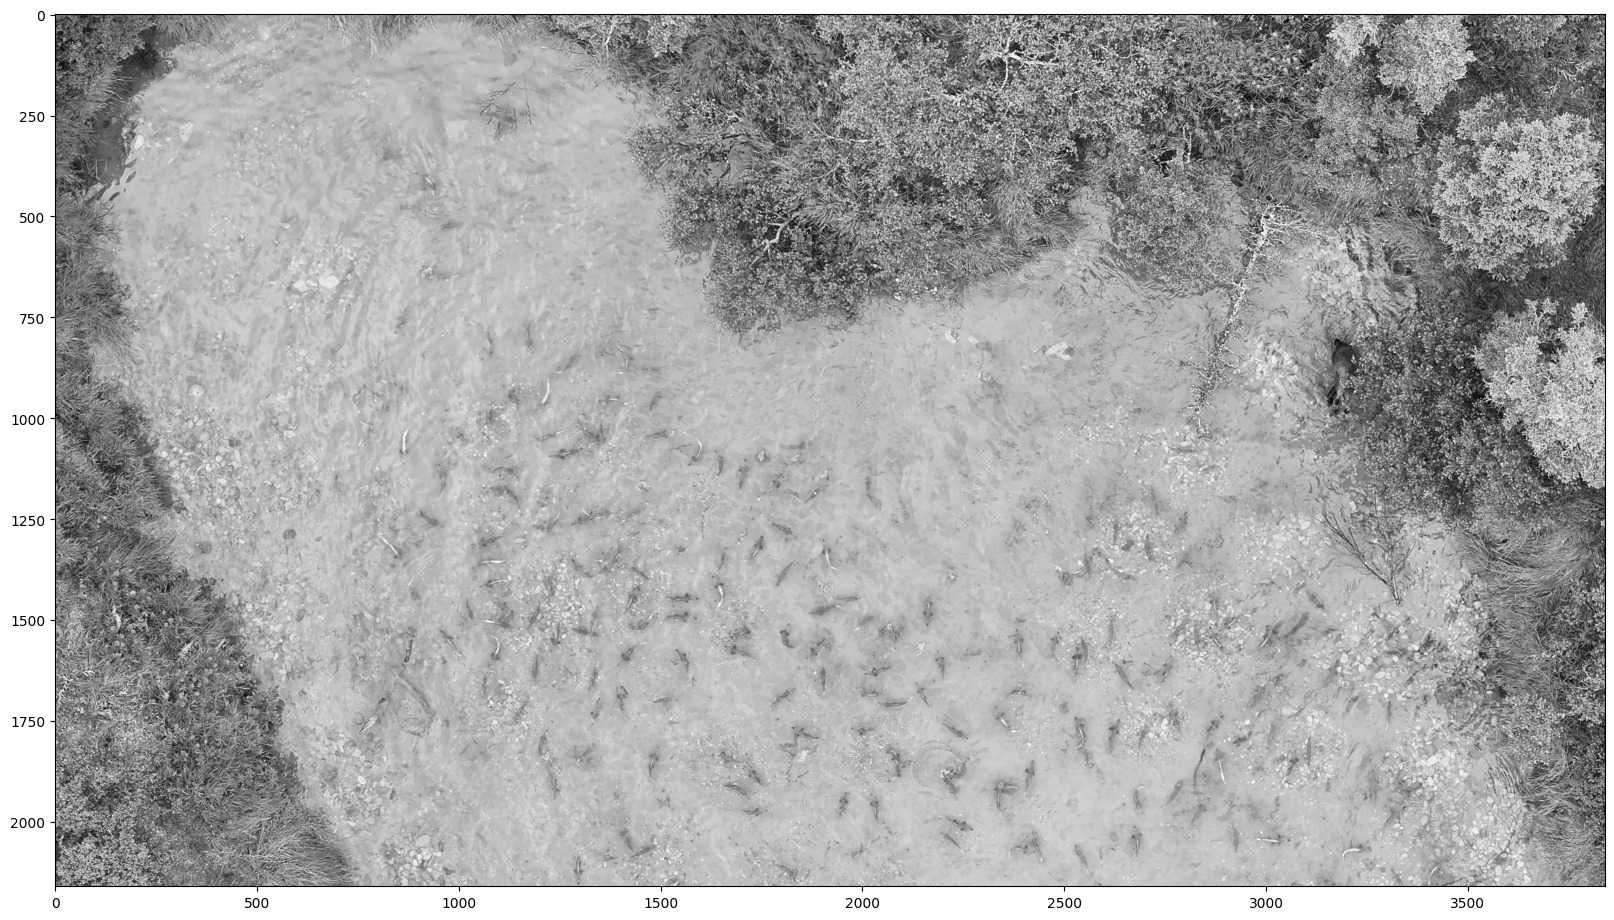

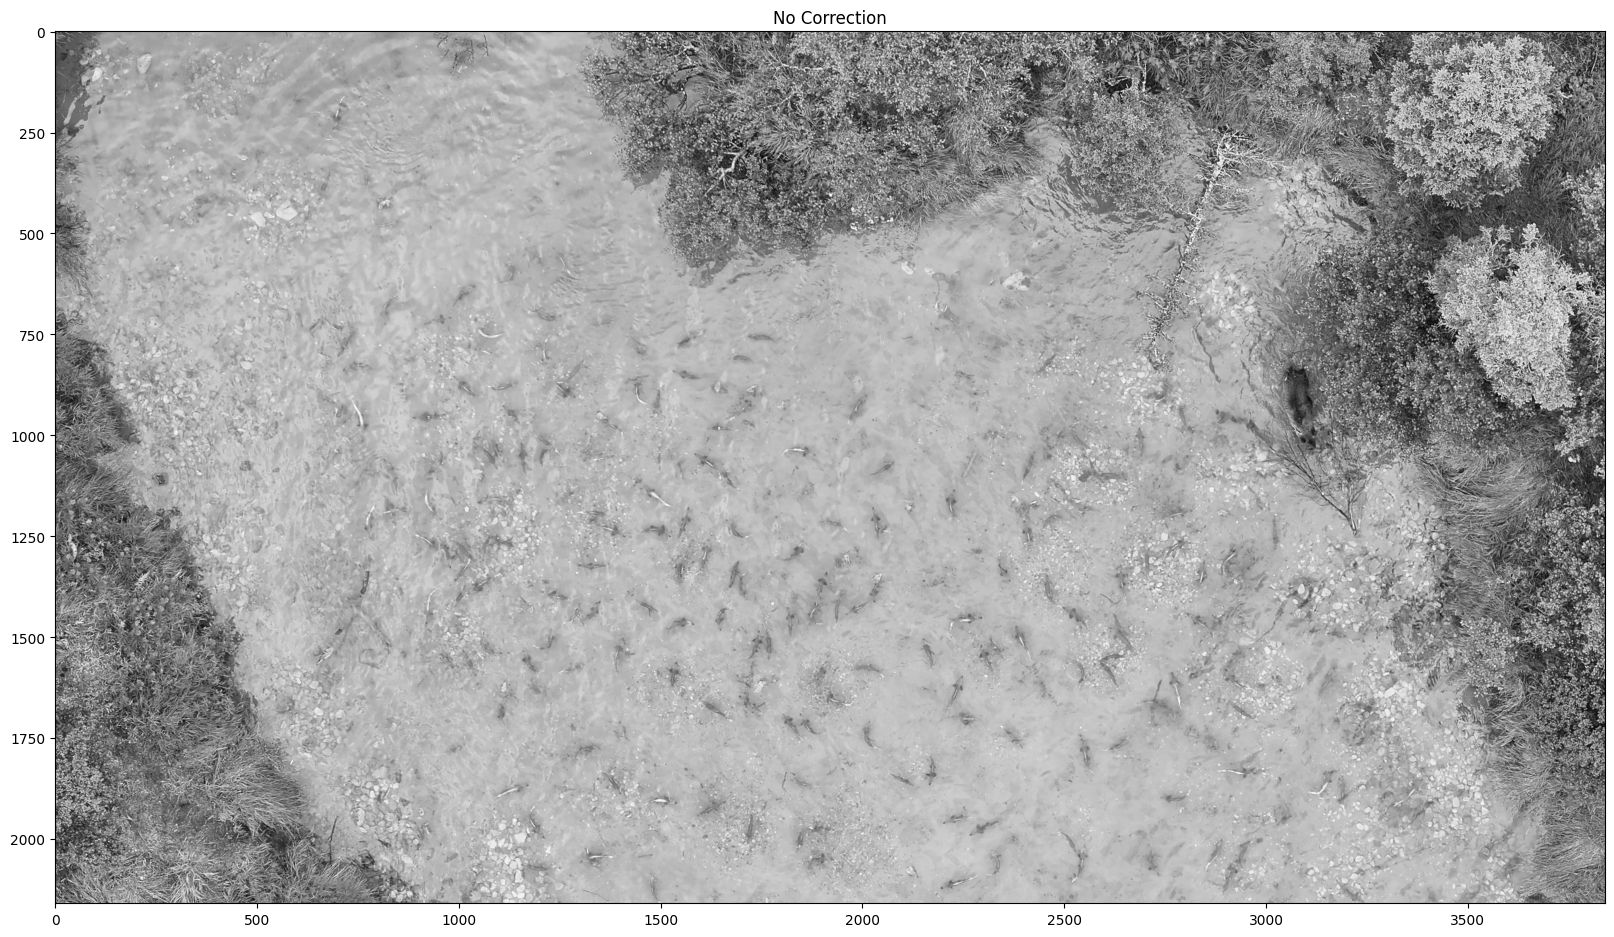

In [9]:
import matplotlib.pyplot as plt
a_ind = 20

anchor_files = [f for f in list(anchor_info['filename'])]

frame0_raw = cv2.imread(anchor_files[a_ind])
frame0_gray = cv2.cvtColor(frame0_raw, cv2.COLOR_BGR2GRAY)

frame1_raw = cv2.imread(anchor_files[a_ind+1])
frame1_gray = cv2.cvtColor(frame1_raw, cv2.COLOR_BGR2GRAY)

warp = final_warps[a_ind]

warped_image = cv2.warpAffine(frame1_gray, M=warp[:2], 
                              dsize=(frame0_raw.shape[1], frame0_raw.shape[0]))

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.imshow(frame1_gray, alpha=.5, cmap='gray')
plt.title("No Correction")

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.imshow(warped_image, alpha=.5, cmap='gray')
plt.title("Corrected")

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.figure(figsize=(20,20))
plt.imshow(frame1_gray, alpha=1.0, cmap='gray')
plt.title("No Correction")